# Sentiment Analysis of ARA Corpus

**Outline:**
1. Read raw data
2. Text preprocessing & cleaning
3. Document representation (feature vectors)
4. Build sentiment classifier based on BOW vectors
5. Build sentiment classifier based on fasstext vectors

**What you need to do:** 
- Read and execute the source code below and answer the questions in **EXERCISE 1 - EXERCISE 4**.
- **Submit** the modifiled file ``TD3.ipynb`` on google drive.

In [1]:
import pandas as pd
import numpy as np

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

# set the font size of plots
plt.rcParams['font.size'] = 14

In [3]:
np.set_printoptions(precision=3)

*****

## Read corpus
We are going to use a different corpus. This corpus is already labelled.

In [4]:
corpus_files = [ './sentiment_data_ARA_pos.txt', './sentiment_data_ARA_neg.txt' ]

In [5]:
def read_text_file(filename):
    print('Reading file ' + filename + "...")
    with open(filename, "r", encoding='utf8') as textfile:
        L = []
        for line in textfile:
            L.append(line.strip())
        print('File contains ', len(L), "lines.\n")
        return L

In [6]:
ara_corpus_pos = read_text_file(corpus_files[0])
ara_corpus_neg = read_text_file(corpus_files[1])

Reading file ./sentiment_data_ARA_pos.txt...


FileNotFoundError: [Errno 2] No such file or directory: './sentiment_data_ARA_pos.txt'

In [ ]:
## Verify corpus

type(ara_corpus_pos),type(ara_corpus_neg)

In [ ]:
len(ara_corpus_pos),len(ara_corpus_neg)

In [ ]:
print(ara_corpus_pos[0])
print(ara_corpus_neg[0])

In [ ]:
## Combine pos and neg corpus into a single corpus for easy manipulation

ara_corpus = ara_corpus_pos + ara_corpus_neg
ara_corpus_sentiment = len(ara_corpus_pos)*[1] + len(ara_corpus_neg)*[-1]

In [ ]:
len(ara_corpus),len(ara_corpus_sentiment)

***

## Text Preprocessing & Cleaning

We are going to follow the same pipeline of TD1, except that here the operations should be **adapted to the Arabic language** (instead of the French language).

1. Remove useless characters (using ``cleanup_text`` function from TD2)
2. Language identification and filtering (using language identification model from TD2)
3. Letter normalization
4. Tokenization
5. Remove stop words
6. Word normalization (stemming)
7. Remove words that are too short or too long.

### EXERCISE 1

Apply the above text cleaning operations by completing the code below (follow the instructins in the comments).

**However in order to save time, you will skip some steps in class and complete them at home.**

In [ ]:
## COMPLETE THE SOURCE CODE IN THE CELLS BELOW. FOLLOW THE INSTRUCTIONS AND HINTS GIVEN IN THE COMMENTS.


In [ ]:
import re
import string
import unicodedata as ud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

stop_words_ar = stopwords.words('arabic')

# regexp for word elongation: matches 3 or more repetitions of a word character.
two_plus_letters_RE = re.compile(r"(\w)\1{1,}", re.DOTALL)
three_plus_letters_RE = re.compile(r"(\w)\1{2,}", re.DOTALL)

# regexp for repeated words
two_plus_words_RE = re.compile(r"(\w+\s+)\1{1,}", re.DOTALL)
#arabic ponctuation
arabic_punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ'''
english_punctuations = string.punctuation
punctuations_list = arabic_punctuations + english_punctuations

def cleanup_text(text):
   
    # Remove URLs
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', '', text)

    # Remove user mentions of the form @username
    text = re.sub('@[^\s]+', '', text)
    
    # Remove special useless characters such as _x000D_
    text = re.sub(r'_[xX]000[dD]_', '', text)

    # Remove redundant white spaces
    text = text.strip()
    text = re.sub('[\s]+', ' ', text)

    # normalize word elongations (characters repeated more than twice)
    text = two_plus_letters_RE.sub(r"\1\1", text)

    # remove repeated words
    text = two_plus_words_RE.sub(r"\1", text)

    #remove repeating char
    re.sub(r'(.)\1+', r'\1', text)
    
    #remove diactritic
    arabic_diacritics = re.compile("""
                             ّ    | # Tashdid
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                             """, re.VERBOSE)
    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ؤ", "ء", text)
    text = re.sub("ئ", "ء", text)
    text = re.sub("ة", "ه", text)
    text = re.sub("گ", "ك", text)
    text = re.sub(arabic_diacritics, '', text)
    
    #remove ponctuation
    translator = str.maketrans('', '', punctuations_list)
    text=text.translate(translator)
    
    return text

In [14]:
# Apply this function to each document in the corpus
ara_corpus_clean = []
for doc in ara_corpus:
    ara_corpus_clean.append(cleanup_text(doc))

In [15]:
assert(len(ara_corpus_clean)==len(ara_corpus))
print(ara_corpus_clean[0])

مكان الرجل الحقيقي كل شي نضيف واصلي وماركات صح غالي شوي بس لبس روعه


In [16]:
##2. Language identification and filtering
# You should just the machine-learning based model that you constructed in TD2 (load it from a file)

# MODIFY THIS STEP AT HOME AS EXPLAINED ABOVE.

# Remove the code below later
# Quick method to save time in class: remove documents that contain more than 30% latin characters
MAX_LAT_FRAC = 0.3
ara_corpus_clean = [doc for doc in ara_corpus_clean if (len(re.findall('[a-zA-Z]',doc)) / len(doc)) < MAX_LAT_FRAC]


In [17]:
assert(len(ara_corpus_clean)<=len(ara_corpus))
print(len(ara_corpus),len(ara_corpus_clean))
print(ara_corpus_clean[0])

10898 10773
مكان الرجل الحقيقي كل شي نضيف واصلي وماركات صح غالي شوي بس لبس روعه


In [18]:
##3. Letter normalization
# Hint: which Arabic letters are equivalent n social media text?  e.g. alef, tah marbuta, dhad and dhad toushel, etc.

# SKIP THIS STEP IN CLASS. COMPLETE IT AT HOME.


In [19]:
##4. Tokenization -- Complete code below (same as in TD1)

# COMPLETE THE CODE BELOW

from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer('[^_\W]+')
ara_corpus_tokenized = [tokenizer.tokenize(doc) for doc in ara_corpus_clean]
print(ara_corpus_tokenized[:25])

[['مكان', 'الرجل', 'الحقيقي', 'كل', 'شي', 'نضيف', 'واصلي', 'وماركات', 'صح', 'غالي', 'شوي', 'بس', 'لبس', 'روعه'], ['جيد', 'جدا', 'المكان', 'يتمتع', 'بطاقم', 'ضيافة', 'علي', 'مستوي', 'عالي', 'منذ', 'دخولك', 'وهم', 'يستقبلوك', 'بالابتسامة', 'يتمتع', 'بموسيقي', 'هادئة', 'ولكن', 'ذلك', 'عندما', 'يكون', 'المطعم', 'غير', 'ممتليء', 'ولكني', 'لاحظت', 'العكس', 'عند', 'امتلاؤه', 'واتوقع', 'ان', 'هذا', 'لكي', 'يجعل', 'الزبائن', 'تأكل', 'بسرعة', 'اكبر', 'لكي', 'يتوافر', 'اماكن', 'اخري', 'لغيرهم', 'بالنسبة', 'للاكل', 'فهو', 'له', 'مذاق', 'جميل', 'وطيب', 'من', 'اللحطة', 'الاولي', 'تشعر', 'بان', 'كمية', 'الاكل', 'غير', 'كافية', 'وغير', 'مناسبة', 'للسعر', 'ولكن', 'عند', 'بدايتك', 'في', 'الاكل', 'تشعر', 'بجودته', 'وتشعر', 'بان', 'الكمية', 'معقولة', 'فعلا', 'الجلسات', 'مريحة', 'جدا', 'فيه', 'واسعاره', 'مناسبة', 'بالنسبة', 'لجودة', 'الاكل'], ['فندق', 'رائع', 'في', 'الواقع', 'الفندق', 'رائع', 'وكذلك', 'العاملين', 'أروع', 'فيه', 'من', 'ناحية', 'التعامل', 'والخدمة', 'الغرف', 'نظيفة', 'ولكنها', 'ضيقة', 'نوعا'

In [20]:
# verify corpus after tokenization
assert(len(ara_corpus_clean) == len(ara_corpus_tokenized))
assert(type(ara_corpus_tokenized[0]) == list and type(ara_corpus_tokenized[0][0]) ==str)

In [21]:
# verify first document in corpus
ara_corpus_tokenized[0]

['مكان',
 'الرجل',
 'الحقيقي',
 'كل',
 'شي',
 'نضيف',
 'واصلي',
 'وماركات',
 'صح',
 'غالي',
 'شوي',
 'بس',
 'لبس',
 'روعه']

In [22]:
##5. Remove stop words -- based on a 'standard' list of stopwords for the Arabic language.

# COMPLETE THE CODE BELOW  (See TD1)

# Load stop words from NLTK library
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words_ar = stopwords.words('arabic')
type(stop_words_ar),len(stop_words_ar)
print(stop_words_ar[0:10])

# FEEL FREE TO ADD MORE WORDS TO THIS LIST IF YOU WANT ...


# For each document, remove stop words
ara_corpus_tokenized = [[word for word in doc  if word not in stop_words_ar] for doc in ara_corpus_tokenized]
print(len(ara_corpus_tokenized))



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Monta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['إذ', 'إذا', 'إذما', 'إذن', 'أف', 'أقل', 'أكثر', 'ألا', 'إلا', 'التي']
10773


In [23]:
# verify corpus after removing stop words
assert(len(ara_corpus_clean) == len(ara_corpus_tokenized))
assert(type(ara_corpus_tokenized[0]) == list and type(ara_corpus_tokenized[0][0]) ==str)

In [24]:
# verify first document
ara_corpus_tokenized[0]

['مكان',
 'الرجل',
 'الحقيقي',
 'شي',
 'نضيف',
 'واصلي',
 'وماركات',
 'صح',
 'غالي',
 'شوي',
 'لبس',
 'روعه']

In [25]:
##6. Stemming
# Hints: stemming is a difficult task for the Arabic language because words are often combined into one word (called agglutination).
#     You should first visually inspect all the words in your corpus to get an idea about which words are good candidates for stemming ...
#     Then try to think of a few simple stemming heuristics (regular expressions), such as: remove certain prefixes (e.g. al), remove certain suffixes (e.g. 'ouna') ...
# SKIP THIS STEP IN CLASS TO SAVE TIME. COMPLETE IT AT HOME.
from snowballstemmer import stemmer
ara_corpus_doc= []
ara_corpus_stemmed=[]
ar_stemmer = stemmer("arabic")
for doc in ara_corpus_tokenized:
    for word in doc:
        ara_corpus_doc.append(ar_stemmer.stemWord(word))
    
    ara_corpus_stemmed.append(ara_corpus_doc)
    ara_corpus_doc= []
print(ara_corpus_stemmed[0])
print(len(ara_corpus_stemmed))

['مكان', 'رجل', 'حقيق', 'شي', 'نضيف', 'واصل', 'ماركا', 'صح', 'غال', 'شو', 'لبس', 'روع']
10773


In [26]:
##7. Remove words that are too short or too long.
# Very short words are usually not very meaningful.
# Very long words are usually either wrong, or elongated, or derived words that should be stemmed (normalized).

# ENTER YOUR CODE BELOW. See TD1.

In [27]:
#ara_corpus_stemmed = [[word for word in doc if len(word)>=2] for doc in ara_corpus_stemmed]


#this stemming is not very helpfull in our case

****

## Document Representation
Remember that the goal of this step is to transform each document from a list of words to a numeric *feature vector*. Each feature corresponds to a distinct word in a selected vocabulary. These feature vectors are stored in a numeric matrix called the **Document-Term Matrix (DTM)**.

We will achieve this using *tfidf-BOW* method, as we did in **TD1**.

In [28]:
# EXECUTE THE CODE BELOW THEN ANSWER THE QUESTIONS IN THE EXERCISE.


#### Prepare the corpus for BOW

In [29]:
# First, concatenate the words in the cleaned corpus (because BOW method in scikit-learn requires this format)
ara_corpus_bow = [' '.join(doc) for doc in ara_corpus_stemmed]

In [30]:
assert(len(ara_corpus_stemmed)==len(ara_corpus_bow))

In [31]:
print(ara_corpus_bow[0])

مكان رجل حقيق شي نضيف واصل ماركا صح غال شو لبس روع


#### Build the vocabulary set
Extract the vocabulary set from our corpus and calculate IDF values of each word in this set.

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [33]:
# Configuration parameters of the BOW model
# FEEL FREE TO MODIFY THESE PARAMETERS AS NEEDED ...
max_words = 10000
maxdf = 1.0
mindf = 0.01

In [34]:
# create an instance of this class
bow_model = TfidfVectorizer(max_df=maxdf, min_df=mindf, max_features=max_words, stop_words=[], use_idf = True)

In [35]:
# call fit() method in order to prepare BOW method (determine vocabulary and IDF values)
bow_model.fit(ara_corpus_bow)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=10000, min_df=0.01,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=[], strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

#### Build the DTM matrix

In [36]:
# Call the transform method in order to calculate DTM matrix of our corpus
ara_bow_dtm = bow_model.transform(ara_corpus_bow)

In [37]:
# Verify the type and size of this matrix
print(type(ara_bow_dtm))
print(ara_bow_dtm.shape)

<class 'scipy.sparse.csr.csr_matrix'>
(10773, 767)


#### Visually inspect the vocabulary
This should help you **tune** the BOW configuration parameters (i.e. min_df, max_df, etc.) ...

In [38]:
# The vocabulary of BOW -- i.e. the words that were selected by BOW method to be in the vocabulary
bow_vocab = bow_model.get_feature_names()
type(bow_vocab), len(bow_vocab)

(list, 767)

In [39]:
# The words that were ignored (and were not included in the vocabulary)
ignored_words = bow_model.stop_words_
type(ignored_words),len(ignored_words)

(set, 29298)

In [95]:
#### DON'T DO THIS !!! THERE ARE TOO MANY IGNORED WORDS
print(str(ignored_words)[:50])

{'ممتازللاقام', 'واتفرج', 'اصول', 'sim', 'تجاذب', 'ياصاحب', 'يكسب', 'زوق', 'موير', 'تقطت', 'عيوب', 'كلن', 'كباق', 'تتخربط', 'لاري', 'انخلع', 'متعلقات', 'يستعمل', 'شنو', 'رواعه', 'بالقو', 'معوقا', 'يشاور', 'ششهر', 'اطيل', 'تسود', 'اغذ', 'مننتجع', 'الجيش', 'لتهاب', 'عصر', 'فصل', 'يقتر', 'جوتل', 'سيدي', 'اضرب', 'كنصب', 'نتوج', 'خاصةحصل', 'معتبر', 'اسعا', 'رضع', 'هاديه', 'ذمه', 'ابدل', 'تانلستيل', 'يمشي', '225', 'سالت', 'يبرق', 'انيمش', 'المش', 'مسوال', 'جاكوب', 'ميريتوس', 'حذرني', 'ازصي', 'يرووح', 'كثاف', 'يجرء', 'حنرجع', 'ايس', 'اثق', 'دلت', 'اادر', 'توكابتك', 'مغلقه', 'اتوب', 'اوملي', 'شاق', 'والمس', 'بانا', 'يدار', 'كوزم', 'وتوغراف', 'ورلد', 'ممتيز', 'متحمس', 'besarabsky', 'عشاان', 'ظاهرا', 'فندقيه', 'ندوق', 'تشويق', 'ماتلاقي', 'اتجد', 'صلي', 'اندا', 'غلط', 'الجص', 'بلح', 'ابحر', 'استنشاق', 'اوعد', 'تعود', 'لانجر', 'ب38', 'مجمد', 'كقيم', 'شفط', 'ديجول', 'نتظر', 'والكو', 'ماخوذ', 'امبروسي', 'كليمار', 'يبار', 'ايظ', 'اصطحاب', 'يذهل', 'ينتيد', 'لبناني', 'مستور', 'سجلا', 'عادا', 'سمن', 'تل

In [41]:
# Put vocavulary and their IDF values in a data frame
df = pd.DataFrame(dict(Word=bow_vocab,IDF=bow_model.idf_))

In [42]:
df.head()

,IDF,Word
0,4.336856,10
1,5.514206,100
2,5.505768,11
3,5.329064,12
4,5.172903,15


In [43]:
df.tail()

,IDF,Word
762,3.168497,يوجد
763,5.522717,يورو
764,5.593543,يوفر
765,3.225273,يوم
766,5.514206,يومين


In [44]:
# Show vocabulary words that have SMALLEST IDF values (i.e. that have the largest document frequencies)
df.sort_values("IDF", inplace=False, ascending = True).head(10)
df['Word']

0          10
1         100
2          11
3          12
4          15
5          20
6        2012
7          30
8          50
9         ابد
10      اتصال
11       اتصل
12      اتمني
13       اثاث
14      اثناء
15       اجاز
16        اجد
17        اجر
18        اجل
19       اجمل
20        احب
21       احبب
22     احترام
23        احد
24        احس
25       احمد
26       اخبر
27     اختيار
28        اخذ
29        اخر
        ...  
737       ويم
738      يارا
739      يبدو
740      يبعد
741       يتم
742     يتميز
743       يجب
744      يجعل
745     يحتاج
746      يحتو
747      يريد
748     يعتبر
749      يعرف
750       يعط
751      يعمل
752       يعن
753      يقدم
754       يقع
755      يقول
756      يقوم
757       يكن
758      يكون
759       يمك
760       ينم
761       يهم
762      يوجد
763      يورو
764      يوفر
765       يوم
766     يومين
Name: Word, Length: 767, dtype: object

In [45]:
# Show vocabulary words that have LARGEST IDF values (i.e. that have the smallest document frequencies)
df.sort_values("IDF", inplace=False, ascending = False).head(10)

,IDF,Word
16,5.593543,اجد
8,5.593543,50
629,5.593543,مفيد
234,5.593543,جو
42,5.593543,استاهل
594,5.593543,مرور
472,5.593543,فرع
764,5.593543,يوفر
194,5.593543,تعرف
68,5.593543,اطعم


In [46]:
# If you want, you can save the vocabulary into a file
# df.sort_values("IDF", inplace=False, ascending = True).to_csv("./models/bow_vocab.csv", index=False, header=True)

#### Remove documents that do not contain any vocabulary terms
i.e. remove rows in the DTM that are all zeros.

In [47]:
nb_terms_per_doc = np.array((ara_bow_dtm>0).sum(axis=1))  # calculate sum of rows of DTM matrix
nb_terms_per_doc = nb_terms_per_doc.ravel()  # convert result to a 1D array (instead of 2D array)
ara_bow_dtm.shape,nb_terms_per_doc.shape

((10773, 767), (10773,))

In [48]:
pd.Series(nb_terms_per_doc).describe()

count    10773.000000
mean        24.224728
std         21.419477
min          0.000000
25%          8.000000
50%         19.000000
75%         33.000000
max        241.000000
dtype: float64

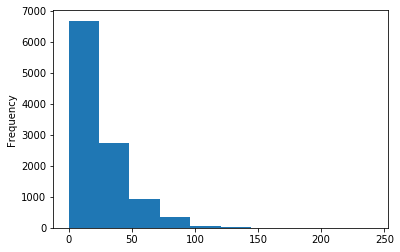

In [49]:
pd.Series(nb_terms_per_doc).plot(kind='hist')

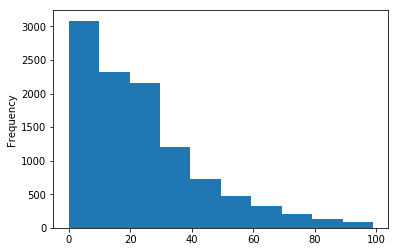

In [50]:
pd.Series(nb_terms_per_doc[nb_terms_per_doc<100]).plot(kind='hist')

In [51]:
# Number of documents that contain LESS THAN 5 vocabulary term
np.sum(nb_terms_per_doc<=5)

1962

In [52]:
# Number of documents that contain ZERO vocabulary terms
np.sum(nb_terms_per_doc==0)

171

In [53]:
# Which documents have length 0? (i.e. contain 0 words)
[doc for i,doc in enumerate(ara_corpus_bow) if nb_terms_per_doc[i]==0]

['ايجابيا و سلبيا قطاع ثوم مبتكر',
 'سامسونج جالكس اس دوال S7562 اسود شريحت',
 'رب يحفظ مارشال يمن دوس مجرم انقلاب',
 'دام عز ك طنا',
 'هنجم راس',
 'هب',
 'معجب',
 'خام زعيم الفذ',
 'دستور',
 'مبرو الف مبر',
 'موبايل جامد اوي رستيش',
 'اعز لله يبطل لام عربيه اسلام',
 'حمد لله',
 'ايجابيا و سلبيا توكنج توم القط متكلم GP2130',
 'ووه',
 'ايجابيا و سلبيا خاخ لعصر ليم',
 'ممتااز',
 'رفع راس يابطال ع ايد حناء',
 'راايع',
 'وعد اوفي',
 'قرارا تثلج صدر',
 'صناع سامسونج',
 'ممتااز',
 'عشت يابطل',
 'ربنا يبار فيك ياريس',
 'وايد حلوو واحب',
 'ودر كولاج',
 'اكرم',
 'يمن',
 'ايجابيا و سلبيا انجر تنكر قطو',
 'ايجابيا و سلبيا طقم نيو واتش SW5005 White نساء',
 'ايجابيا و سلبيا سامسونج جالكس I9105 اس2 بلس 8 جيجاباي اندرويد كحل غامق',
 '85',
 'شراب كولاج امريك',
 'حفظ اله ياصقر',
 'ربنا يكرم',
 'قرار حكيم ايه زعيم',
 'رووع',
 'زعيم طراز نادر',
 'عجب واحبب',
 'سكو ياهاد يدل ع حنك',
 'زعيم متواضع وحدو',
 'تقيمي متواضع',
 'االل معك زعيم',
 'راايع',
 'حبيبي مرسي',
 'راجل',
 'ممتازز',
 '7عغ',
 'حميل',
 'نعم 

In [54]:
idx = nb_terms_per_doc>0
ara_bow_dtm_filt = ara_bow_dtm[nb_terms_per_doc>0,:]
ara_corpus_bow_filt = [ara_corpus_bow[i] for i,x in enumerate(idx) if x]
ara_corpus_sentiment_filt = [ara_corpus_sentiment[i] for i,x in enumerate(idx) if x]

In [55]:
ara_bow_dtm.shape,len(ara_corpus_bow)

((10773, 767), 10773)

In [56]:
ara_bow_dtm_filt.shape,len(ara_corpus_bow_filt),len(ara_corpus_sentiment_filt)

((10602, 767), 10602, 10602)

### EXERCISE 2

Answer the following questions based on visual inspection of the above results:

1. How many words are then in the BOW vocabulary and how many words were ignored?
2. Give examples of 5 words in the vocabulary set of BOW but are not very useful for machine learning.
3. Give examples of 5 words that are **not** in the voabulary of BOW but might be useful.
4. Give examples of 5 words in the vocabulary set of BOW that are useful but should be stemmed or normalized.
5. Propose new values of the configuration parameters of BOW in order to tune the vocabulary to be more satisfactory. 

**Important Remarks**:
- Your answer to all questions will depend on how you do **text cleaning**. So you should rectify your answers after completing text cleaning part (at home).
- Your answer to Q4 will be quite **subjective**, so you just need to justify your choice. 


### ANSWER

1) there are 767 words in bow vocabulary and 29298 are ignored

2) These are 5 words in the vocabulary set of BOW but are not very useful for machine learning.
[
,اتصال
,استخدام
,اسعار
,برنامج
,جهاز
]

3)These are 5 words that are not in the voabulary of BOW but might be useful.\n
[
,عيوب
,متننمق
,فااشل
,مشاء
,عنيف
]

4)an example of a word in the vocabulary set of BOW that is useful but should be stemmed or normalized
is يومين which should be يوم 

5)maybe 

maxdf = 9.0
mindf = 0.1

******

## Build Sentiment Classifier
We will use the machine learning approach, i.e. train a classifier.

In [57]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [58]:
X = ara_bow_dtm_filt
y = ara_corpus_sentiment_filt
y[670:]

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [59]:
# Split the data into training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1996)

In [60]:
print(X_train.shape)
print(len(y_train))
print(X_test.shape)
print(len(y_test))
assert(len(y_test)+len(y_train)==len(y))

(7421, 767)
7421
(3181, 767)
3181


### Train classifier using logistic regression

In [61]:
# Read documentation
# ?LogisticRegression

In [62]:
# Train the model using Logistic Regression method

LR_model = LogisticRegression(penalty='l2')
LR_model.fit(X_train, y_train)
print(X_train)
print(y_train)

  (0, 383)	0.804834816524051
  (0, 549)	0.5934988779354998
  (1, 18)	0.1334486128769071
  (1, 49)	0.12261955000137052
  (1, 69)	0.10511510418424344
  (1, 102)	0.13897345032599753
  (1, 117)	0.16043377643497803
  (1, 124)	0.17150514773404718
  (1, 128)	0.15629699968163174
  (1, 134)	0.20958048954367142
  (1, 140)	0.1057769231341755
  (1, 196)	0.12979811711701975
  (1, 214)	0.1117007130740321
  (1, 227)	0.14122203209349413
  (1, 242)	0.1430904689566383
  (1, 248)	0.38730406065256157
  (1, 259)	0.12910135355085386
  (1, 298)	0.11555020604281023
  (1, 305)	0.06407686482946066
  (1, 329)	0.19477022137307187
  (1, 360)	0.1088151676034125
  (1, 367)	0.13497518580503592
  (1, 395)	0.09271454363446954
  (1, 428)	0.44053734889832286
  (1, 481)	0.1468231967088472
  :	:
  (7419, 512)	0.07553041182270966
  (7419, 515)	0.07057530003858054
  (7419, 518)	0.052479563634621355
  (7419, 520)	0.09113706056485625
  (7419, 522)	0.0750334845488266
  (7419, 530)	0.055691717545269324
  (7419, 548)	0.0775644595

In [63]:
# Use this model to predict the sentiment category of test documents
y_pred_LR = LR_model.predict(X_test)

In [64]:
type(y_pred_LR),len(y_pred_LR)

(numpy.ndarray, 3181)

In [65]:
# Calculate the classification rate of this classifier
metrics.accuracy_score(y_test, y_pred_LR)

0.8745677459918265

In [66]:
# Display the confusion matrix
print(metrics.confusion_matrix(y_test, y_pred_LR))

[[1216  210]
 [ 189 1566]]


### Interpret parameter values of  this model
- The logistic regression model has one parameter per feature (i.e. vocabulary word).
- Most positive values indicate parameters that contribute most to class 1
- Most negative values indicate parameters contribute most to class -1

In [67]:
# Re-train the model using ALL DATA
LR_model2 = LogisticRegression(penalty='l2')
LR_model2.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [68]:
# get the coefficients (parameter) of the LR model
LR_coefs = LR_model2.coef_   #2D array with only one row
LR_coefs = LR_coefs.ravel()  #convert to a 1D array
print(type(LR_coefs))
print(LR_coefs.shape)

<class 'numpy.ndarray'>
(767,)


In [69]:
# Verify that the number of coefficients = number of words in vocabulary
assert(len(bow_model.get_feature_names())==len(LR_coefs))

In [70]:
# Put the coefficients in a Pandas Series for ease of visualization
pd.Series(LR_coefs).describe()

count    767.000000
mean       0.146287
std        1.139649
min       -8.825373
25%       -0.450909
50%        0.139757
75%        0.698925
max        8.542629
dtype: float64

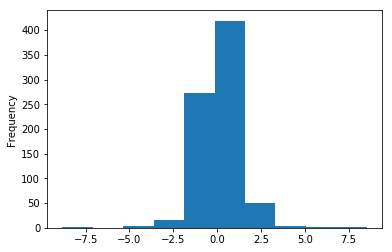

In [71]:
pd.Series(LR_coefs).plot(kind='hist')

In [97]:
## COMPLETE THE CODE BELOW BASED ON THE INSTRUCTIONS IN THE COMMENTS.
# HINT: put the coefficients and the vocabulary words in a Pandas DataFrame ...


# 1) Sort coefficient values in ascending order
df = pd.DataFrame(dict(Word=bow_vocab, Coef=LR_coefs))

df_sorted=df.sort_values("Coef", inplace=False, ascending = True)
# 2) Display the 20 largest coefficients and their corresponding words
print(df_sorted.tail(20))

# 3) Display the 20 smallest coefficients and their corresponding words

print(df_sorted.head(20))

         Coef   Word
351  2.490052     سن
643  2.507385   مميز
702  2.520219   واسع
20   2.548937    احب
21   2.574019   احبب
538  2.623451   لطيف
329  2.693935   زيار
74   2.784734   اعجب
302  2.793359    راق
537  2.810146   لذيذ
38   2.920442   اروع
19   2.970736   اجمل
641  3.009011   ممتع
378  3.065609    شكر
595  3.525490   مريح
319  3.536763    روع
237  3.878377    جيد
230  4.610472   جميل
640  6.423544  ممتاز
305  8.542629   رايع
         Coef   Word
358 -8.825373    سيء
58  -5.085689   اسوء
496 -4.110045    قذر
9   -4.099727    ابد
607 -3.105039     مش
56  -3.028851    اسف
313 -2.650020   رديء
423 -2.615222    عاد
331 -2.594887     سء
338 -2.512282    سبب
400 -2.325473   ضعيف
460 -2.284838    غال
287 -2.268465    دفع
656 -2.246257     مو
488 -2.231787    قال
70  -2.182266  اطلاق
556 -2.162182  مبالغ
243 -2.151523    حجز
202 -2.043724    تكن
495 -1.956303   قديم


### EXERCISE 3

Answer the following questions based on the results of the logistic regression model.

1. Based on the *confusion matrix* above, is this classifier **biased**?  Note: we say a classifier is *biased* if it makes *significantly* more errors for one class than the other (false positives vs. false negatives).
2. Which 5 words are most aossicatd with positive sentiment?  (hint: see most positive coefficients)
3. Which 5 words are most aossicatd with negative sentiment?  (hint: see most negative coefficients)
4. Do these results make sense?  (if they don't, then there is something wrong with the data and/or processing pipeline ...)
5. (OPTIONAL) Show all test documents that are positive but are predicted negative by this classifier. Do you notice any trends?
6. (OPTIONAL) Show all test documents that are negative but are predicted positive by this classifier. Do you notice any trends?

### ANSWER
1) Yes based on the confusion matrix this model is biased.

2)
سن
مميز
واسع
احب
احبب

3)
سيء
اسوء
قذر
ابد
مش

4)yes, these results make sense.

### Train classifier using Naive Bayes

In [73]:
# read documentation
# ?MultinomialNB

In [74]:
## Build Naive Bayes classification model

NB_model = MultinomialNB(alpha = 1.0)
NB_model.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [75]:
# Use this model to predict the sentiment category of test documents
y_pred_NB = NB_model.predict(X_test)

In [76]:
# Classification rate
metrics.accuracy_score(y_test, y_pred_NB)

0.8478465891229173

In [77]:
# Confusion matrix
metrics.confusion_matrix(y_test, y_pred_NB)

array([[1121,  305],
       [ 179, 1576]], dtype=int64)

### Interpret parameters of  the model
- Naive Bayes model has two parameters per feature (i.e. vocabulary word)
- These parameters are stored in a 2x$n$ array, where $n$ is the number of vocabulary words
- The first row of this array contains **log of conditional probabilities** Pr(xi|class1)
- The second row contains **log of conditional probabilities** Pr(xi|class2)
- Ideally, if parameter value $\approx$ 0 then the corresponding vocabulary word is very important for that class
- Ideally, if parameter value $\approx - \infty$ then the corresponding vocabulary word is not important at all for that class

In [78]:
# Re-train the model using ALL DATA
NB_model2 = MultinomialNB(alpha = 1.0)
NB_model2.fit(X, y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [79]:
# get NB model's coefficients
NB_coefs = NB_model2.feature_log_prob_
print(type(NB_coefs))
print(NB_coefs.shape)

<class 'numpy.ndarray'>
(2, 767)


In [80]:
assert(NB_coefs.shape[0] == 2)
assert(NB_coefs.shape[1] == len(bow_model.get_feature_names()))

In [81]:
# determine the order of classes in this model
NB_model2.classes_

array([-1,  1])

In [82]:
# paramaters associated with the NEGATIVE class
NB_coefs_neg_class = NB_coefs[0,:]

In [83]:
# paramaters associated with the POSITIVE class
NB_coefs_pos_class = NB_coefs[1,:]

In [84]:
pd.Series(NB_coefs_neg_class).describe()

count    767.000000
mean      -6.928116
std        0.723262
min       -9.221461
25%       -7.409733
50%       -6.981655
75%       -6.497663
max       -4.207456
dtype: float64

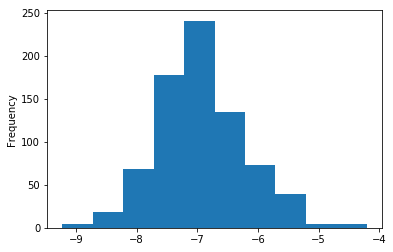

In [85]:
pd.Series(NB_coefs_neg_class).plot(kind='hist')

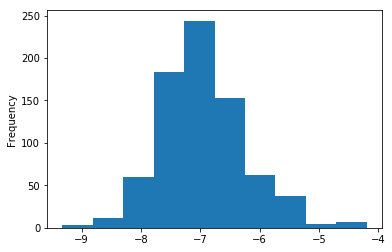

In [86]:
pd.Series(NB_coefs_pos_class).plot(kind='hist')

In [98]:
## COMPLETE THE CODE BELOW

# Sort the coefficient values of the POSITIVE CLASS in ascending order

df_pos = pd.DataFrame(dict(Word=bow_vocab, Coef=NB_coefs_pos_class))

df_pos_sorted=df_pos.sort_values("Coef", inplace=False, ascending = True)

# Display the 20 largest coefficients and their corresponding words

print(df_pos_sorted.tail(20))

# Display the 20 smallest coefficients and their corresponding words

print(df_pos_sorted.head(20))



# Repeat the same thing for the coefficients of the negative class


df_neg = pd.DataFrame(dict(Word=bow_vocab, Coef=NB_coefs_neg_class))

df_neg_sorted=df_neg.sort_values("Coef", inplace=False, ascending = True)

# Display the 20 largest coefficients and their corresponding words

print(df_neg_sorted.tail(20))

# Display the 20 smallest coefficients and their corresponding words

print(df_neg_sorted.head(20))


         Coef   Word
117 -5.365797     ان
687 -5.365008   نظيف
82  -5.328791   افضل
486 -5.304400     في
618 -5.292318   مطعم
453 -5.292163    عند
124 -5.287880   انصح
634 -5.269805   مكان
661 -5.258978   موقع
229 -5.154877   جميع
268 -5.000449    خدم
674 -4.950977    ندق
462 -4.844801    غرف
230 -4.680282   جميل
237 -4.564261    جيد
640 -4.511203  ممتاز
480 -4.487416   فندق
515 -4.411526    كان
221 -4.314320    جدا
305 -4.191665   رايع
         Coef   Word
496 -9.325855    قذر
313 -9.045912   رديء
355 -8.909264    سوء
58  -8.758174   اسوء
11  -8.716512   اتصل
331 -8.709919     سء
416 -8.664309    طلع
335 -8.529750    سال
26  -8.528116   اخبر
246 -8.395234    حدث
672 -8.370201    نجم
241 -8.331896   حاول
48  -8.323018  استطع
232 -8.322888    جني
387 -8.299094    صار
639 -8.248438   مليء
309 -8.231526    رحت
533 -8.200100   لدرج
178 -8.183535   تحدث
440 -8.174080   عشان
         Coef  Word
762 -5.440843  يوجد
415 -5.428558   طلب
660 -5.427144  موظف
486 -5.417970    في
342 -5.414721   سع

### EXERCISE 4

Answer the following questions based on the results of the Naive Bayes model.

1. Based on the *confusion matrix* above, is this Naive Bayes classifier **biased**?  Note: we say a classifier is *biased* if it makes significantly more errors for one class than the other (false positives vs. false negatives).
2. Which classification method is more accurate for this data: 
2. Which 5 words are most aossicatd with positive sentiment?  (hint: see most positive coefficients)
3. Which 5 words are most aossicatd with negative sentiment?  (hint: see most negative coefficients)
4. Do these results make sense?  (if they don't, then there is something wrong with the data and/or processing pipeline ...)

### ANSWER

1)Yes, the Naive Bayes classifier is biased.

2)The first method is more accurate.

3)
ان
نظيف
افضل
في
مطعم

4)
يوجد
طلب
موظف
في
سعر
انا

5)These results are not very convincing

****

### EXERCISE 5 (OPTIONAL)
Repeat thE entire TD for TUN corpus.  This is optional for the TD, but you need to do it anyway for the final project.

In [88]:
tun_corpus_files = [ './sentiment_data_TUN_pos.txt', './sentiment_data_TUN_neg.txt' ]